In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

Loading the data and combining the two datasets


In [5]:
calories = pd.read_csv("calories.csv")

In [6]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
exercise = pd.read_csv("exercise.csv")

In [8]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
# Combined data
df = pd.concat([exercise, calories], axis = 1)

In [10]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


In [11]:
df = pd.concat([exercise, calories["Calories"]], axis = 1)

In [12]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
df.shape

(15000, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [15]:
df.replace({'Gender':{'male':0,'female':1}},inplace=True)

C:\Users\rashm\AppData\Local\Temp\ipykernel_7808\1088024582.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'male':0,'female':1}},inplace=True)


In [16]:
df.drop(['User_ID'],axis=1,inplace=True)
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,0,78,193.0,97.0,2.0,84.0,38.3,11.0


Descriptive Analysis

Q1. What is the correlation between these variables?

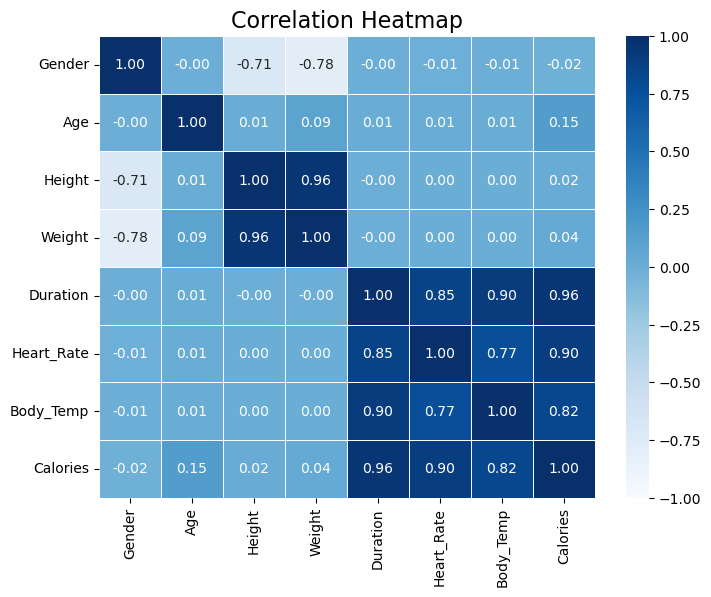

In [19]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()

Q: What is the distribution of males and females in the dataset?

Text(0, 0.5, 'Count')

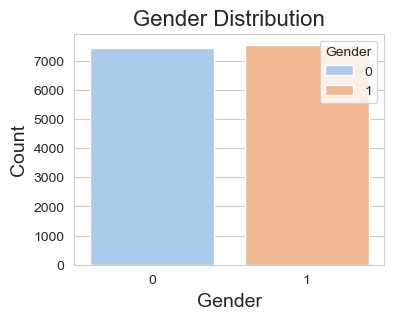

In [21]:
# Set the style and palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create the count plot
plt.figure(figsize=(4, 3))  # Adjust the figure size as needed
ax = sns.countplot(x='Gender', hue= 'Gender', data=df)

# Add a title and labels
ax.set_title('Gender Distribution', fontsize=16)
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

The data has equal proprotion of males and females.

Q: What is the relationship between Heart Rate and Calories?

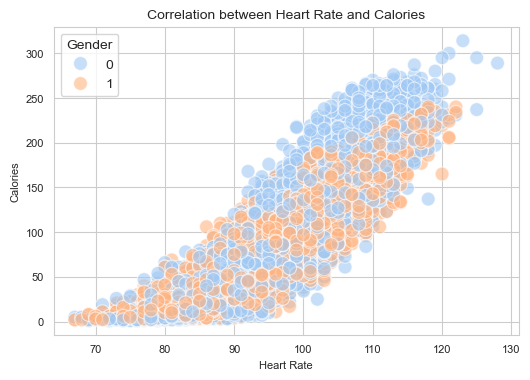

In [24]:
plt.figure(figsize=(6, 4))

# Create the scatter plot
sns.scatterplot(x='Heart_Rate', y='Calories', data=df, hue = 'Gender', s=100, alpha=0.6, edgecolor='w')

# Add a title and labels
plt.title('Correlation between Heart Rate and Calories', fontsize=10)
plt.xlabel('Heart Rate', fontsize=8)
plt.ylabel('Calories', fontsize=8)

# Customize the font size of the tick labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# Show the plot
plt.show()

The heart rate and calories burnt during exercise have a positive correlation, so the heart rate increases during exercise.

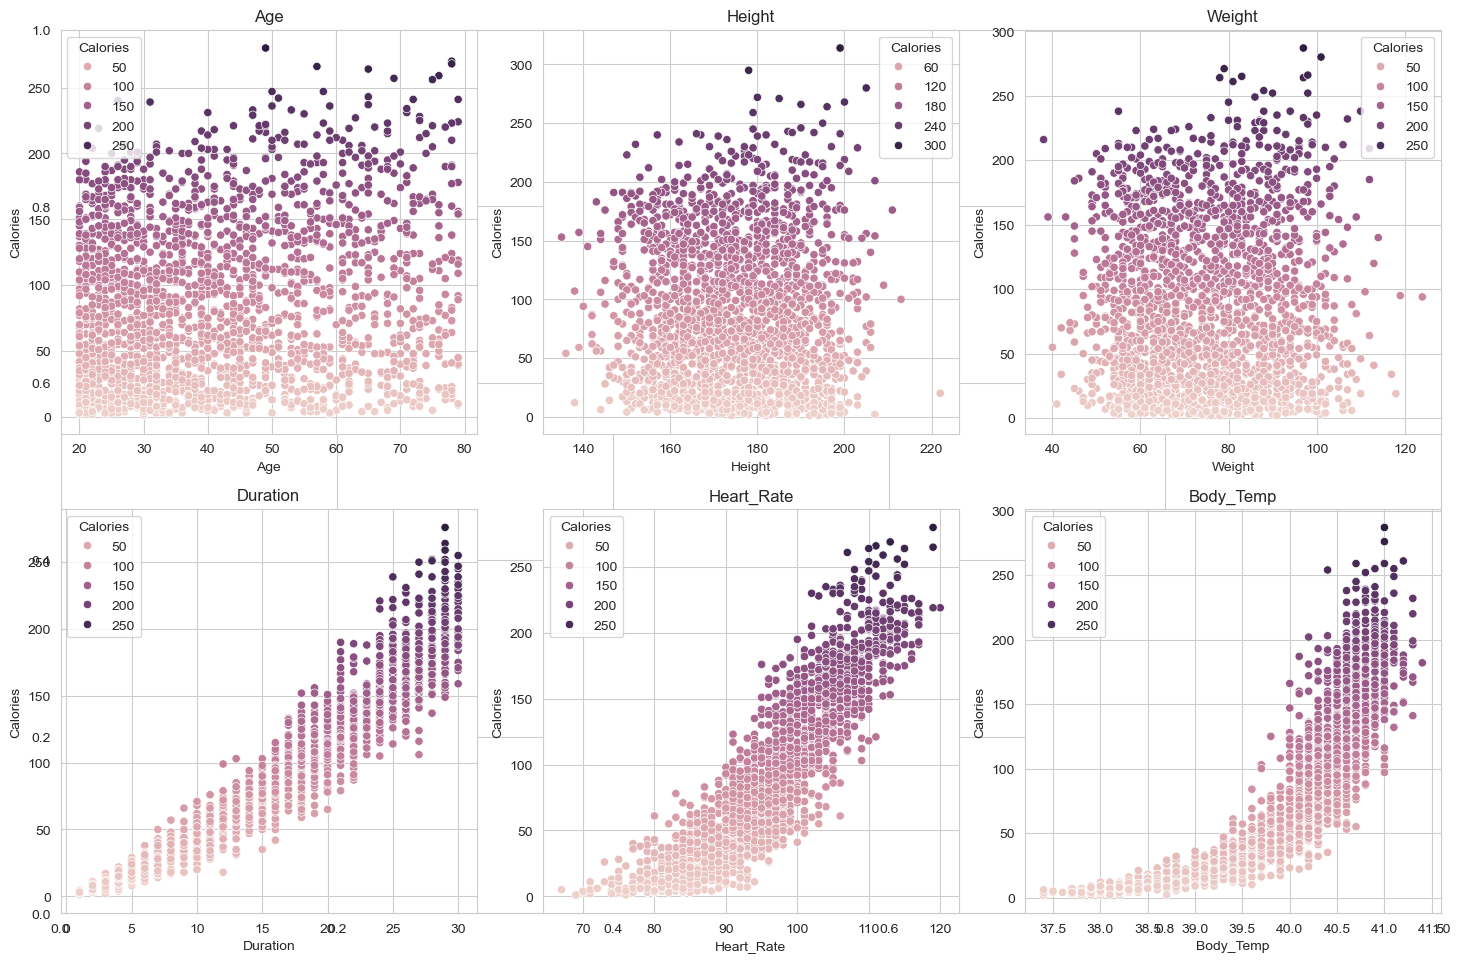

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

y_axis = df.iloc[:,1:-1]
plt.subplots(figsize=(15,10))

for i, col in enumerate(y_axis):
    plt.subplot(2, 3, i+1)
    x = df.sample(2000)
    sns.scatterplot(x=x[col], y=x['Calories'], hue=x['Calories'])
    plt.title(col)  # Optional: to add titles to each subplot

plt.tight_layout()  # Optional: to prevent overlap
plt.show()

Duration of exercise, Heart Rate and Body Temperature have a positive correlation with the Calories burnt during exercise.